In [13]:
import json
import torch
import numpy as np
from datasets import load_from_disk

In [2]:
def subgroup_resample(dataset, rate: float, label_key: str):
    labels = np.array(dataset[label_key])

    sampled_indices = []
    for lbl in np.unique(labels):
        idxs = np.where(labels == lbl)[0]
        chosen = np.random.choice(idxs, size=int(idxs.size * rate), replace=False)
        sampled_indices.extend(chosen.tolist())

    return dataset.select(sampled_indices)

In [3]:
def convert_dataset_format(dataset_arrow_path: str, label_key: str, dataset_name: str, rate: float = 0.1):
    dataset = load_from_disk(dataset_arrow_path)
    dataset = subgroup_resample(dataset, rate, label_key)
    
    tokens = dataset['tokens']
    torch.save(tokens, f"./{dataset_name}_tokens.pt")
    
    labels = dataset[label_key]
    processed_samples = len(dataset) * [None]
    for i in range(len(dataset)):
        processed_samples[i] = {
            'subject': f'{i}'
            , 'object': labels[i]
        }

    dataset_dict = {
        'name': dataset_name
        , 'prompt_templates': []
        , 'samples': processed_samples
    }
    save_json = f"./{dataset_name}.json"
    with open(save_json, "w") as f:
        json.dump(dataset_dict, f)


In [4]:
dataset_arrow_path = r"C:\Users\97254\OneDrive\שולחן העבודה\Projects\llm-context-neurons\data\europarl_lang"
label_key = 'language'
dataset_name = 'europarl_lang'

convert_dataset_format(dataset_arrow_path, label_key, dataset_name)

In [5]:
dataset_arrow_path = r"C:\Users\97254\OneDrive\שולחן העבודה\Projects\llm-context-neurons\data\pile_data_source"
label_key = 'distribution'
dataset_name = 'pile_data_source'

convert_dataset_format(dataset_arrow_path, label_key, dataset_name)

In [14]:
import os
os.listdir()

['Arrow-json conversion.ipynb',
 'centuries_300.json',
 'europarl_lang.json',
 'europarl_lang_tokens.pt',
 'landmarks_450.json',
 'music.json',
 'pile_data_source.json',
 'pile_data_source_tokens.pt']

In [25]:
import json
import pandas as pd
with open('pile_data_source.json') as f:
    data = json.load(f)
    labels = [s['object'] for s in data['samples']]
    print(pd.Series({l: labels.count(l) for l in np.unique(labels)}).sort_values())

enron              46
hackernews         69
wikipedia          73
stack_exchange     86
uspto             105
github            106
freelaw           156
arxiv             190
dtype: int64


In [26]:
with open('europarl_lang.json') as f:
    data = json.load(f)
    labels = [s['object'] for s in data['samples']]
    print(pd.Series({l: labels.count(l) for l in np.unique(labels)}).sort_values())

German        296
English       309
Swedish       309
Spanish       310
Portuguese    311
French        312
Dutch         313
Italian       315
dtype: int64


In [28]:
with open('centuries_300.json') as f:
    data = json.load(f)
    labels = [s['object'] for s in data['samples']]
    print(pd.Series({l: labels.count(l) for l in np.unique(labels)}).sort_values())

18    100
19    100
20    100
dtype: int64


In [30]:
with open('landmarks_450.json') as f:
    data = json.load(f)
    labels = [s['object'] for s in data['samples']]
    print(pd.Series({l: labels.count(l) for l in np.unique(labels)}).sort_values())

Africa    150
Asia      150
Europe    150
dtype: int64


In [32]:
with open('music.json') as f:
    data = json.load(f)
    labels = [s['object'] for s in data['samples']]
    print(pd.Series({l: labels.count(l) for l in np.unique(labels)}).sort_values())

trumpet     51
violin      91
guitar     152
piano      216
dtype: int64


In [36]:
probing_data = pd.read_csv(f'../full_probing_results.csv')
probing_data.head()

,Unnamed: 0,label,layer,neuron,accuracy,f1,mode,method,model_name,probe_type,dataset
0,0,18,0,2728.0,0.666667,0.533333,Binary,Single Neuron,pythia-1.4b,decision_tree,centuries
1,1,18,0,2727.0,0.666667,0.533333,Binary,Single Neuron,pythia-1.4b,decision_tree,centuries
2,2,18,0,2726.0,0.666667,0.533333,Binary,Single Neuron,pythia-1.4b,decision_tree,centuries
3,3,18,0,2725.0,0.666667,0.533333,Binary,Single Neuron,pythia-1.4b,decision_tree,centuries
4,4,18,0,2724.0,0.666667,0.533333,Binary,Single Neuron,pythia-1.4b,decision_tree,centuries


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

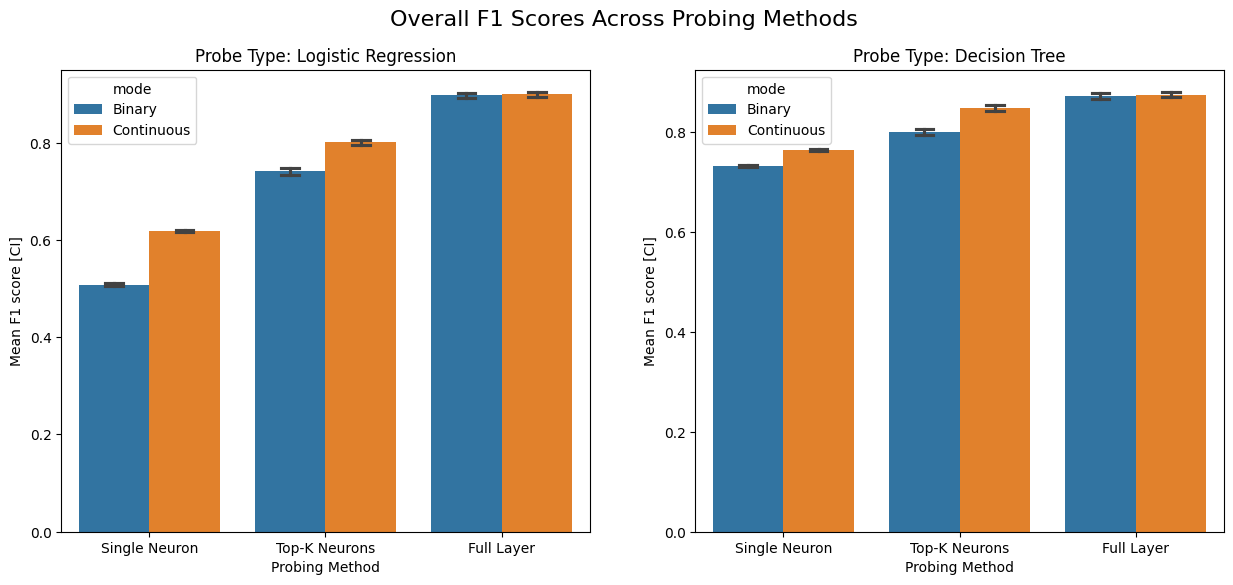

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(probing_data.loc[probing_data['probe_type'] == 'logistic_regression']
            , x='method', y='f1', hue='mode', ax=axes[0], capsize=.2, errorbar='ci')

axes[0].set_xlabel('Probing Method')
axes[0].set_ylabel('Mean F1 score [CI]')
axes[0].set_title('Probe Type: Logistic Regression', fontsize=12)

axes[1].set_xlabel('Probing Method')
axes[1].set_ylabel('Mean F1 score [CI]')
axes[1].set_title('Probe Type: Decision Tree', fontsize=12)

sns.barplot(probing_data.loc[probing_data['probe_type'] == 'decision_tree']
            , x='method', y='f1', hue='mode', ax=axes[1], capsize=.2, errorbar='ci')

plt.suptitle('Overall F1 Scores Across Probing Methods', fontsize=16)
plt.show()

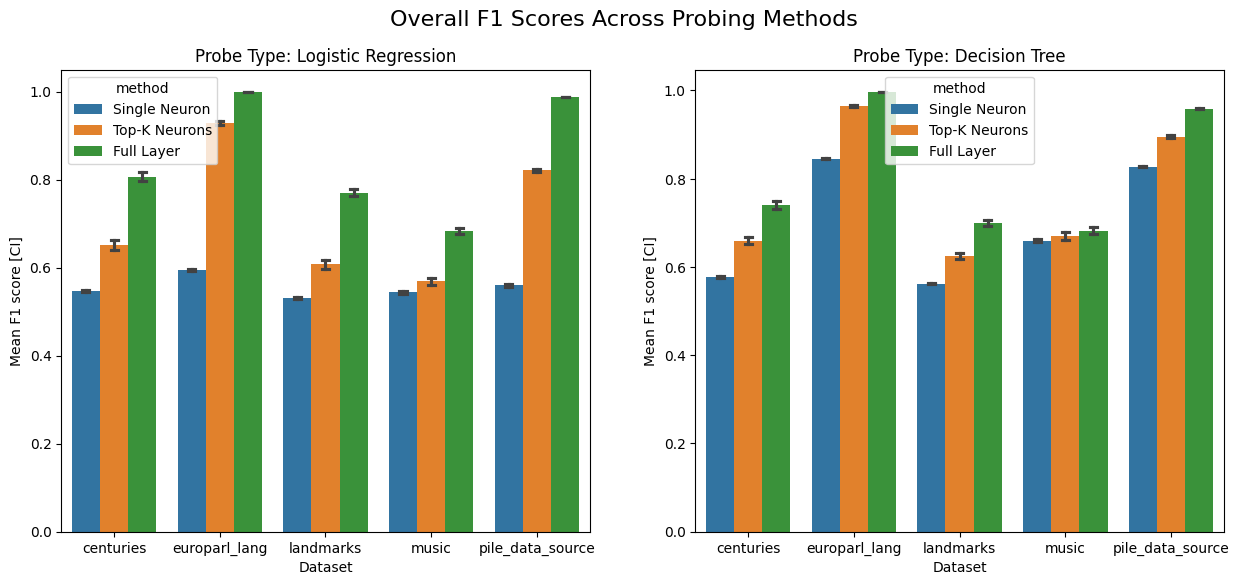

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(probing_data.loc[probing_data['probe_type'] == 'logistic_regression']
            , x='dataset', y='f1', hue='method', ax=axes[0], capsize=.2, errorbar='ci')

axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Mean F1 score [CI]')
axes[0].set_title('Probe Type: Logistic Regression', fontsize=12)

axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Mean F1 score [CI]')
axes[1].set_title('Probe Type: Decision Tree', fontsize=12)

sns.barplot(probing_data.loc[probing_data['probe_type'] == 'decision_tree']
            , x='dataset', y='f1', hue='method', ax=axes[1], capsize=.2, errorbar='ci')

plt.suptitle('Overall F1 Scores Across Probing Methods', fontsize=16)
plt.show()

In [74]:
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial 